# 2D Visualizations of Graphs

Visualization of k-NN graphs with k = 5 or 15 for both our combined descriptors and the [combined model](https://cdn.aaai.org/ISMB/1999/ISMB99-005.pdf).

In [10]:
from venv import create
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from experiment_utils import compute_knn, compute_descriptors_from_file
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df, labels = compute_descriptors_from_file("all_point_clouds.npz")

In [11]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

In [43]:
def create_drawing(data, classes, descriptors, n_neighbors, variant, title):
    knn_graph = compute_knn(data, descriptor_list=descriptors, n_neighbors=n_neighbors, variant=variant)

    graph = nx.from_numpy_array(knn_graph)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
    pos = nx.kamada_kawai_layout(graph)  # Layout for visualization
    nx.draw(graph, pos, with_labels=False, node_size=200, node_color=classes, cmap=plt.cm.tab10, ax=ax)
    
    fig.patch.set_facecolor('#333333')
    fig.suptitle(f"{variant.capitalize()} {title} (k = {n_neighbors})", color="white", fontsize=18)
    fig.tight_layout()
    
    plt.savefig(f"knn_graph_{n_neighbors}_{variant}_{'_'.join(descriptors)}.png")
    plt.show()

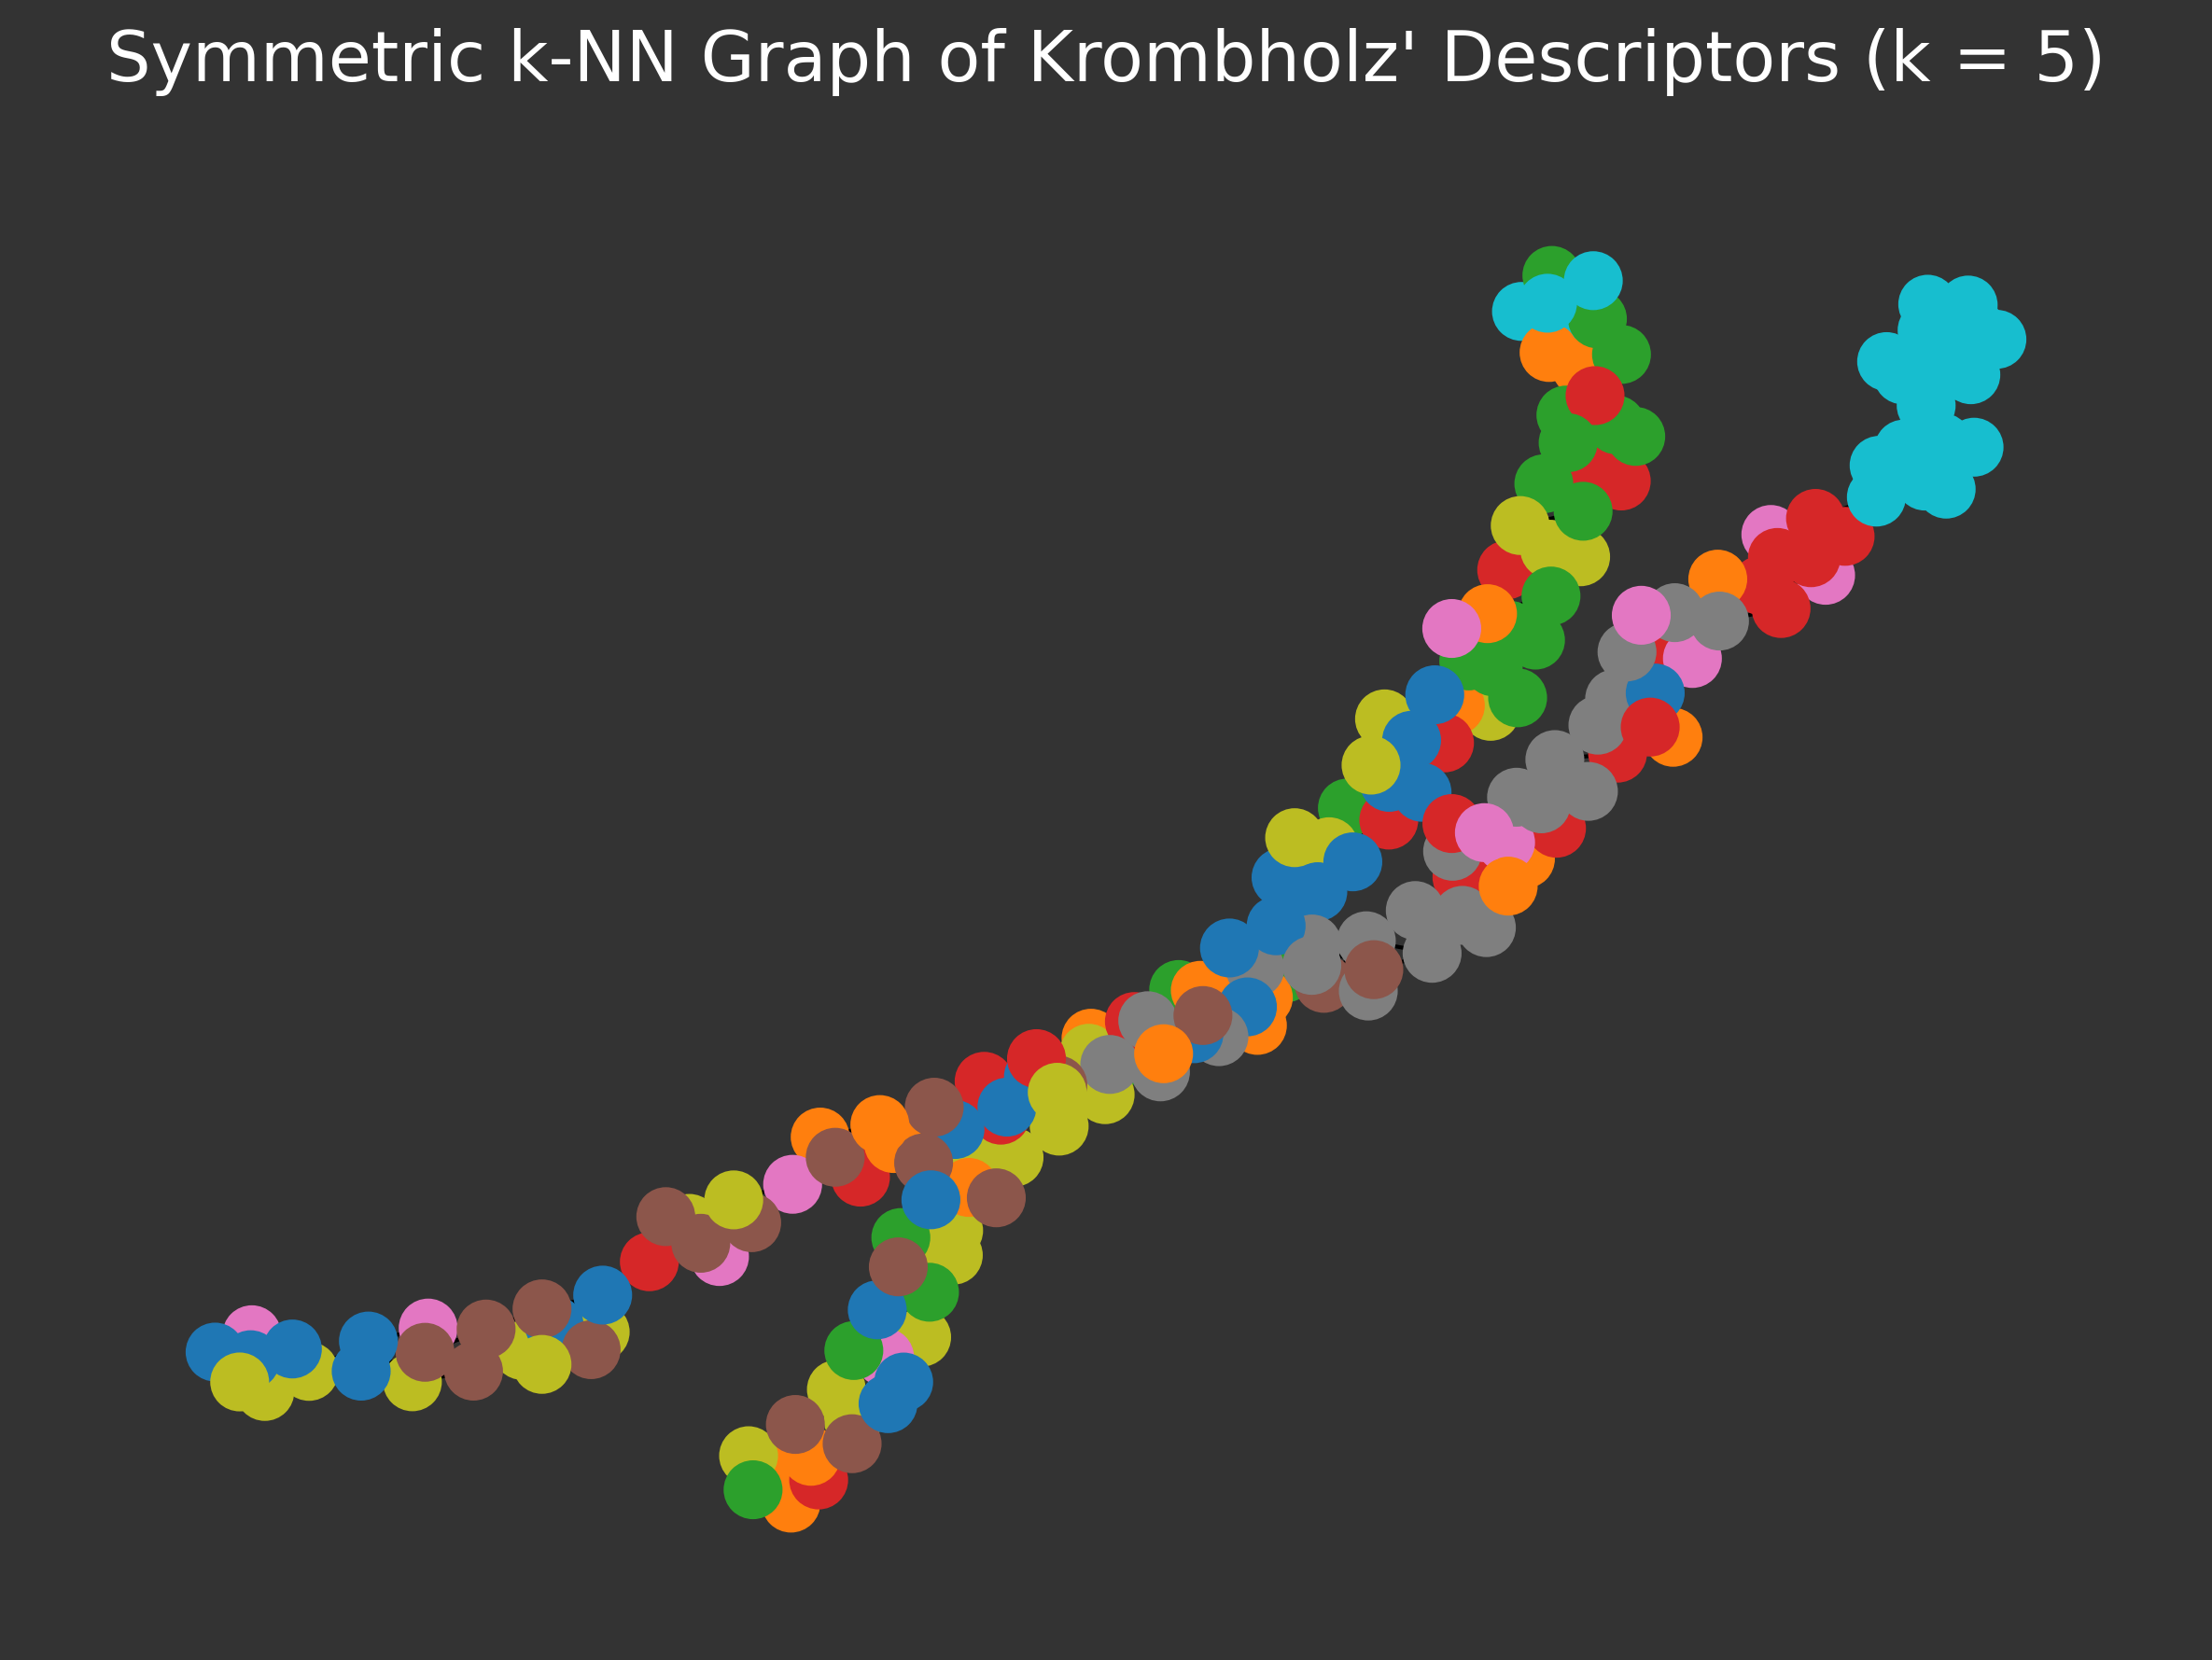

In [44]:
create_drawing(df, labels, ['evrap', 'samp', 'scomp', 'sirm'], 5, 'symmetric', "k-NN Graph of Krombholz' Descriptors")

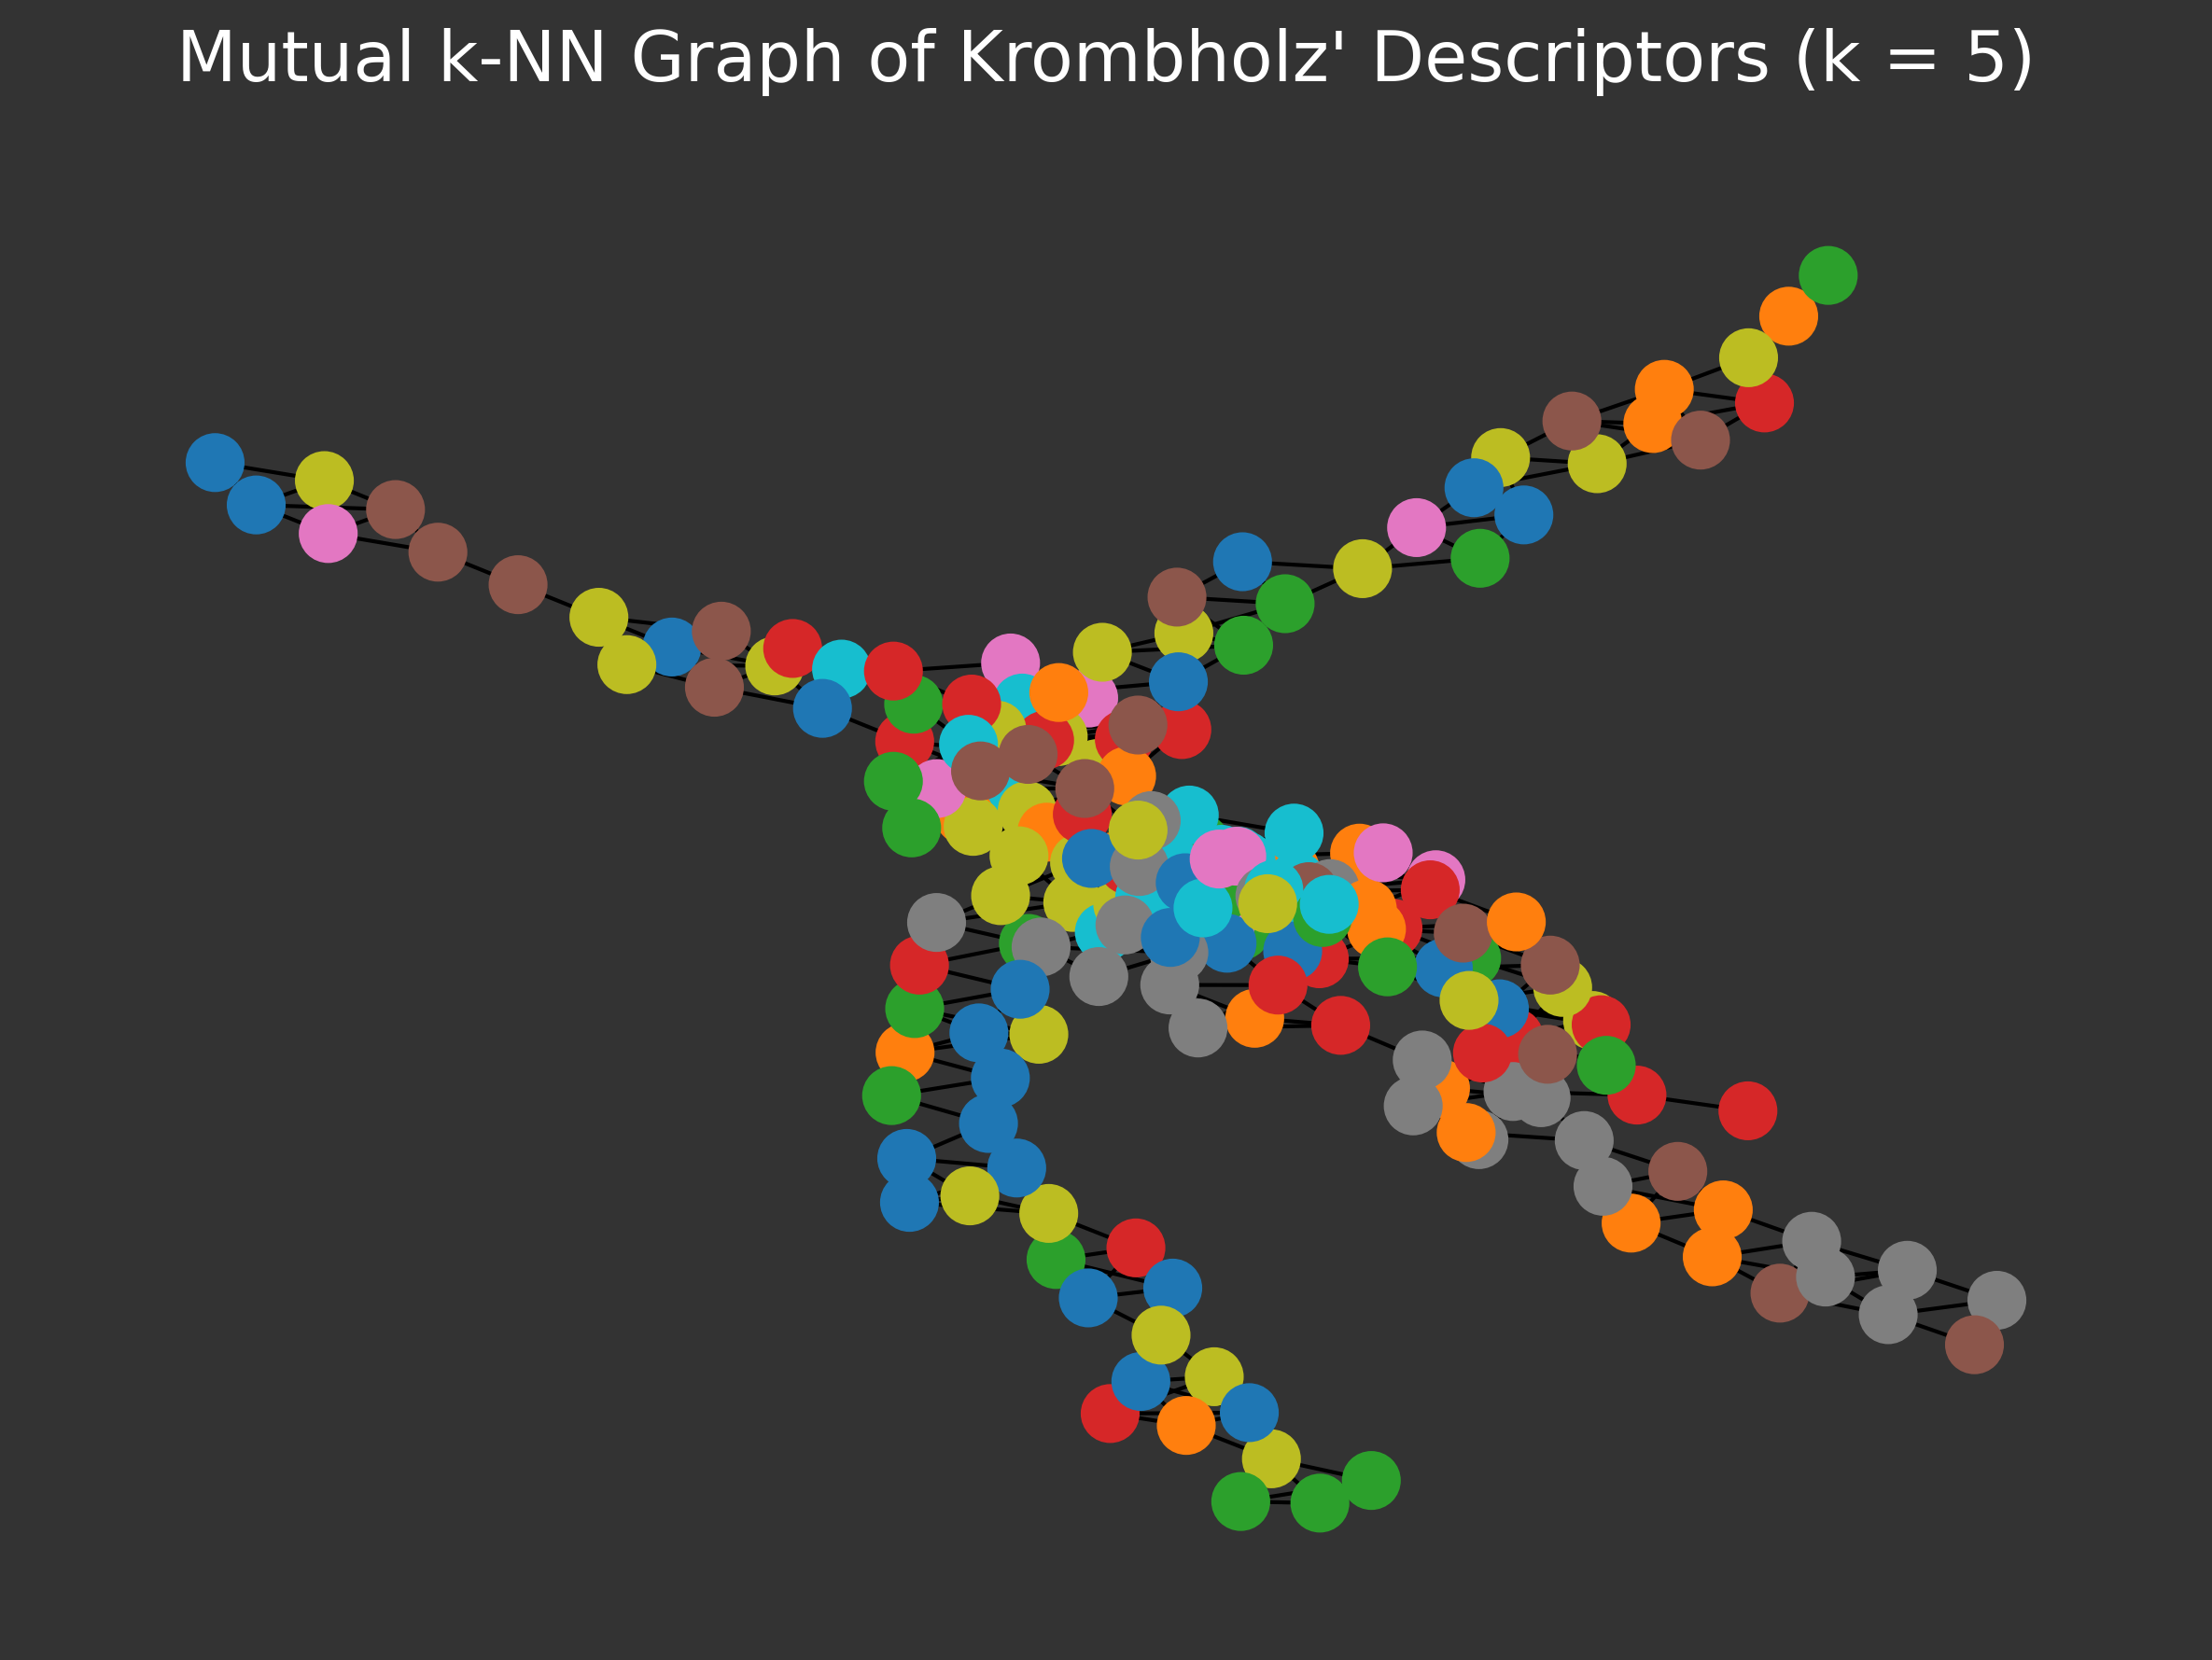

In [45]:
create_drawing(df, labels, ['evrap', 'samp', 'scomp', 'sirm'], 5, 'mutual', "k-NN Graph of Krombholz' Descriptors")

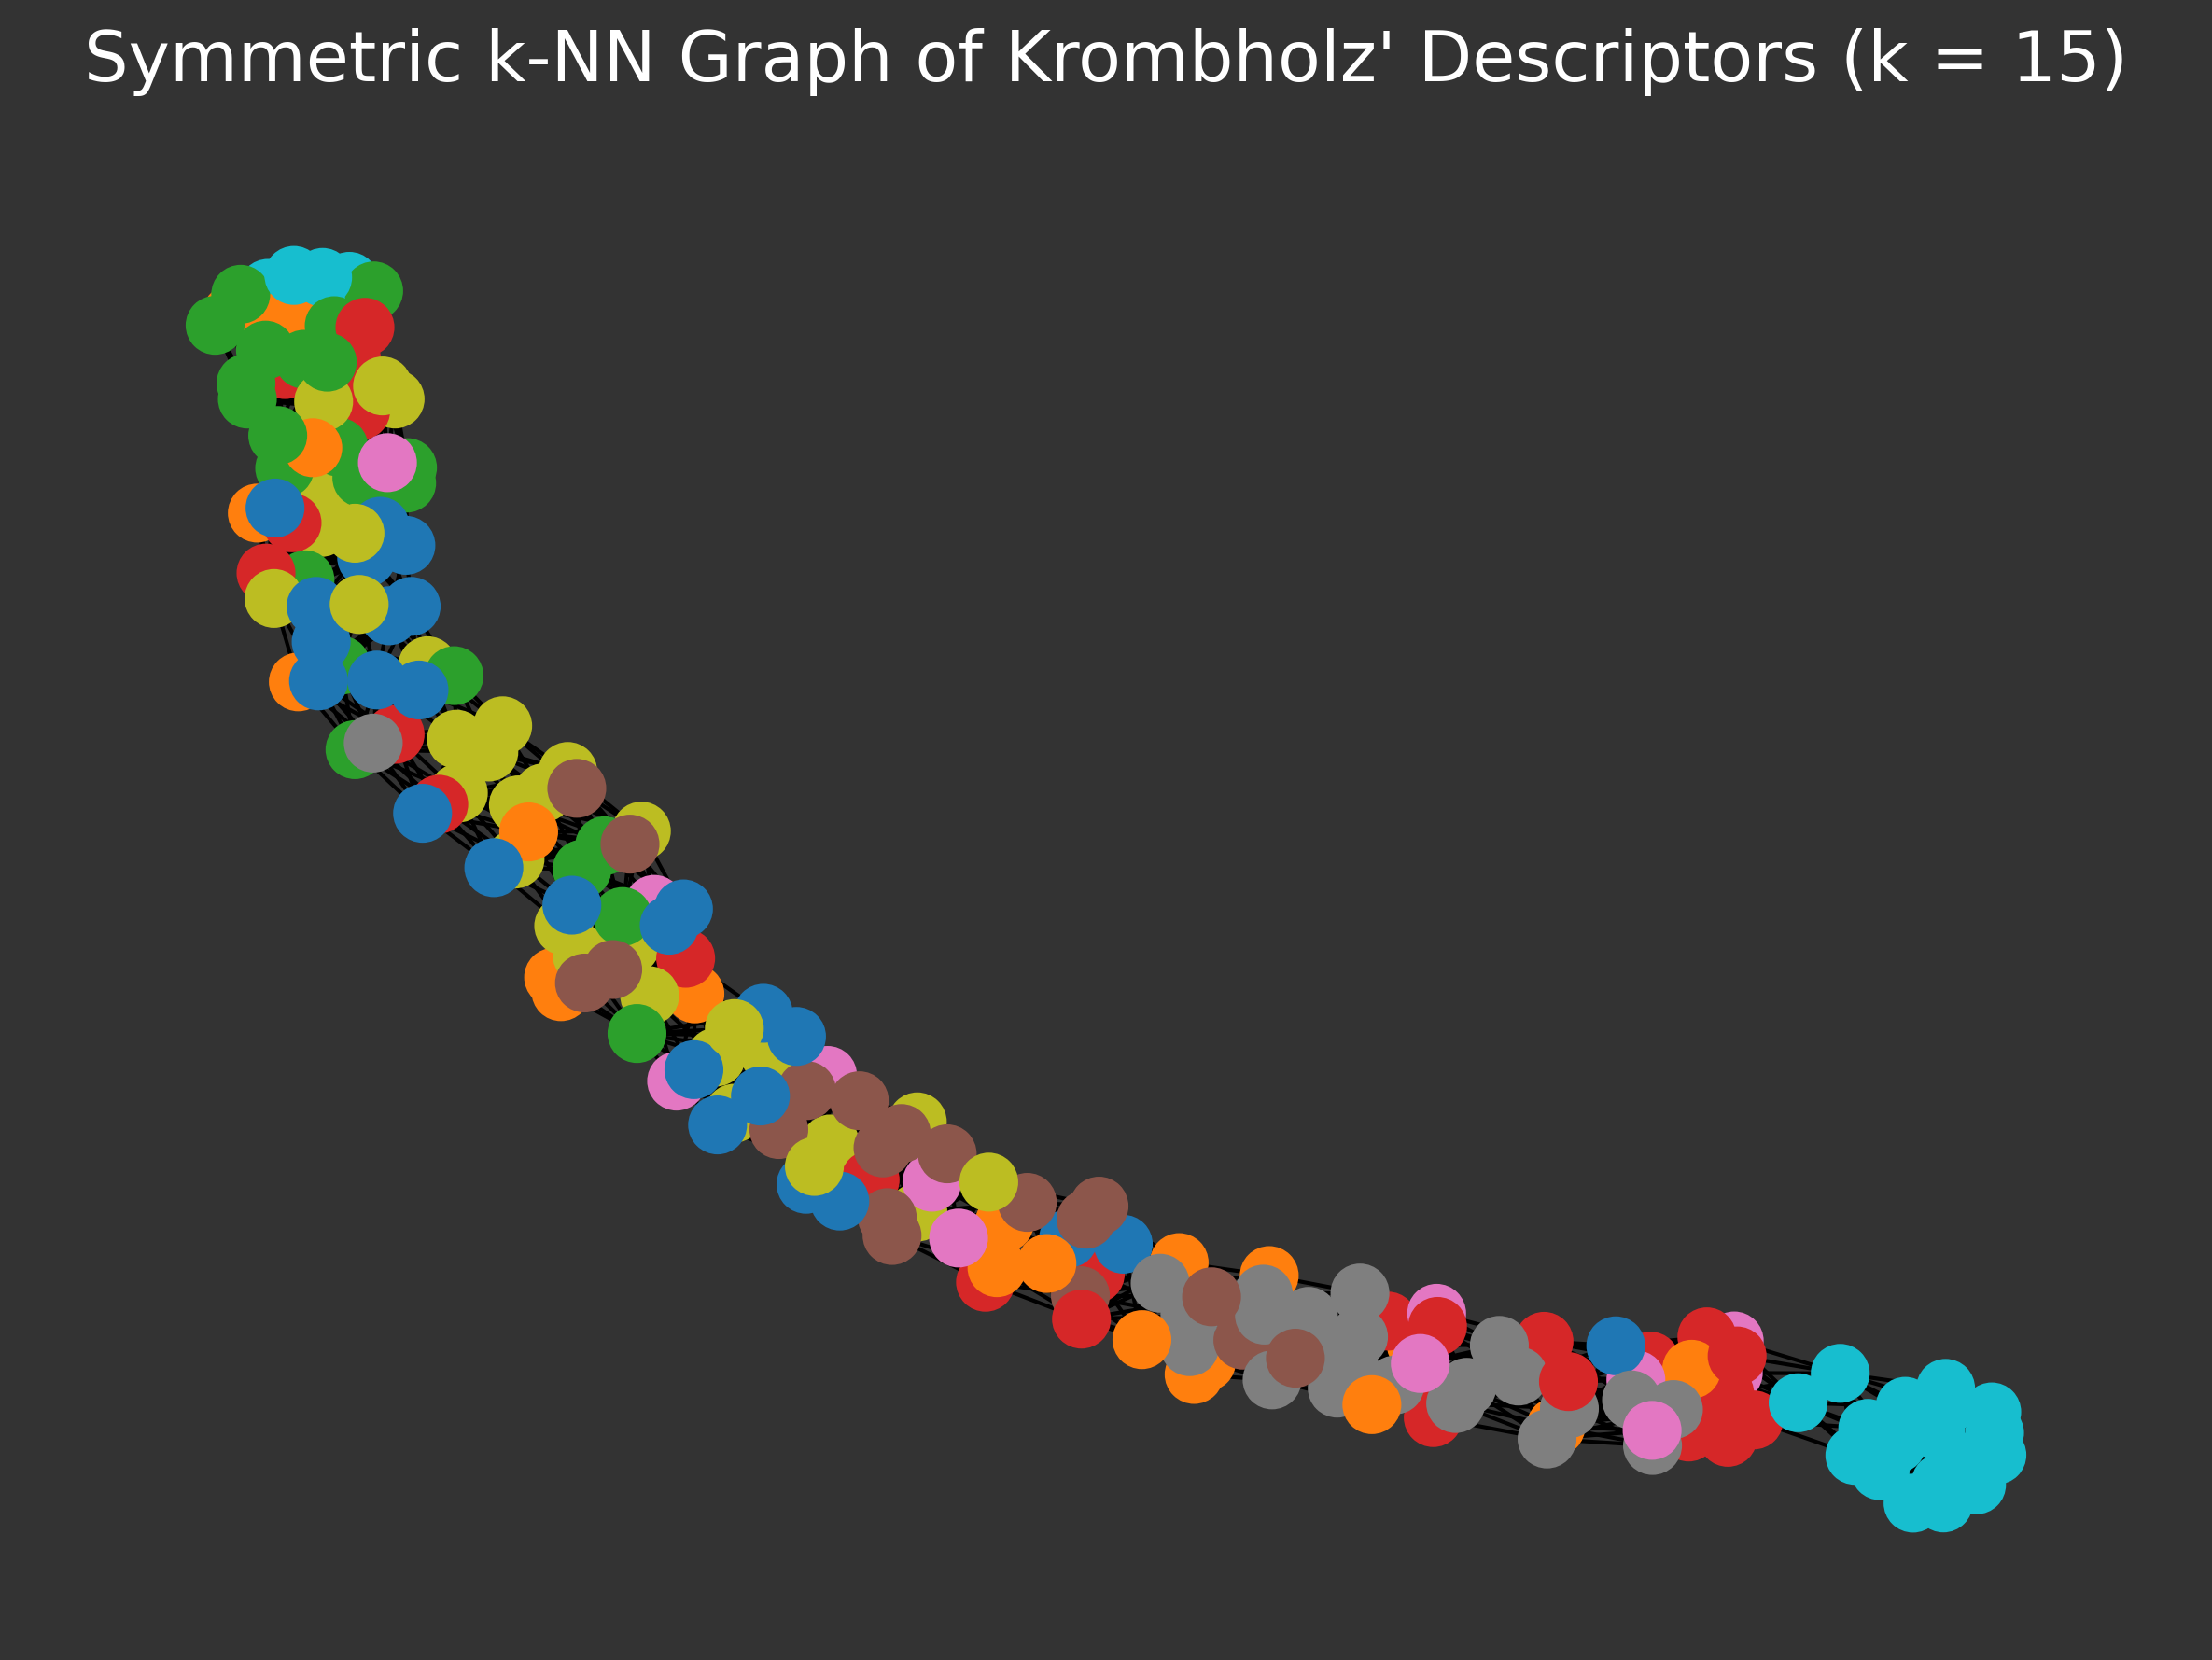

In [46]:
create_drawing(df, labels, ['evrap', 'samp', 'scomp', 'sirm'], 15, 'symmetric', "k-NN Graph of Krombholz' Descriptors")

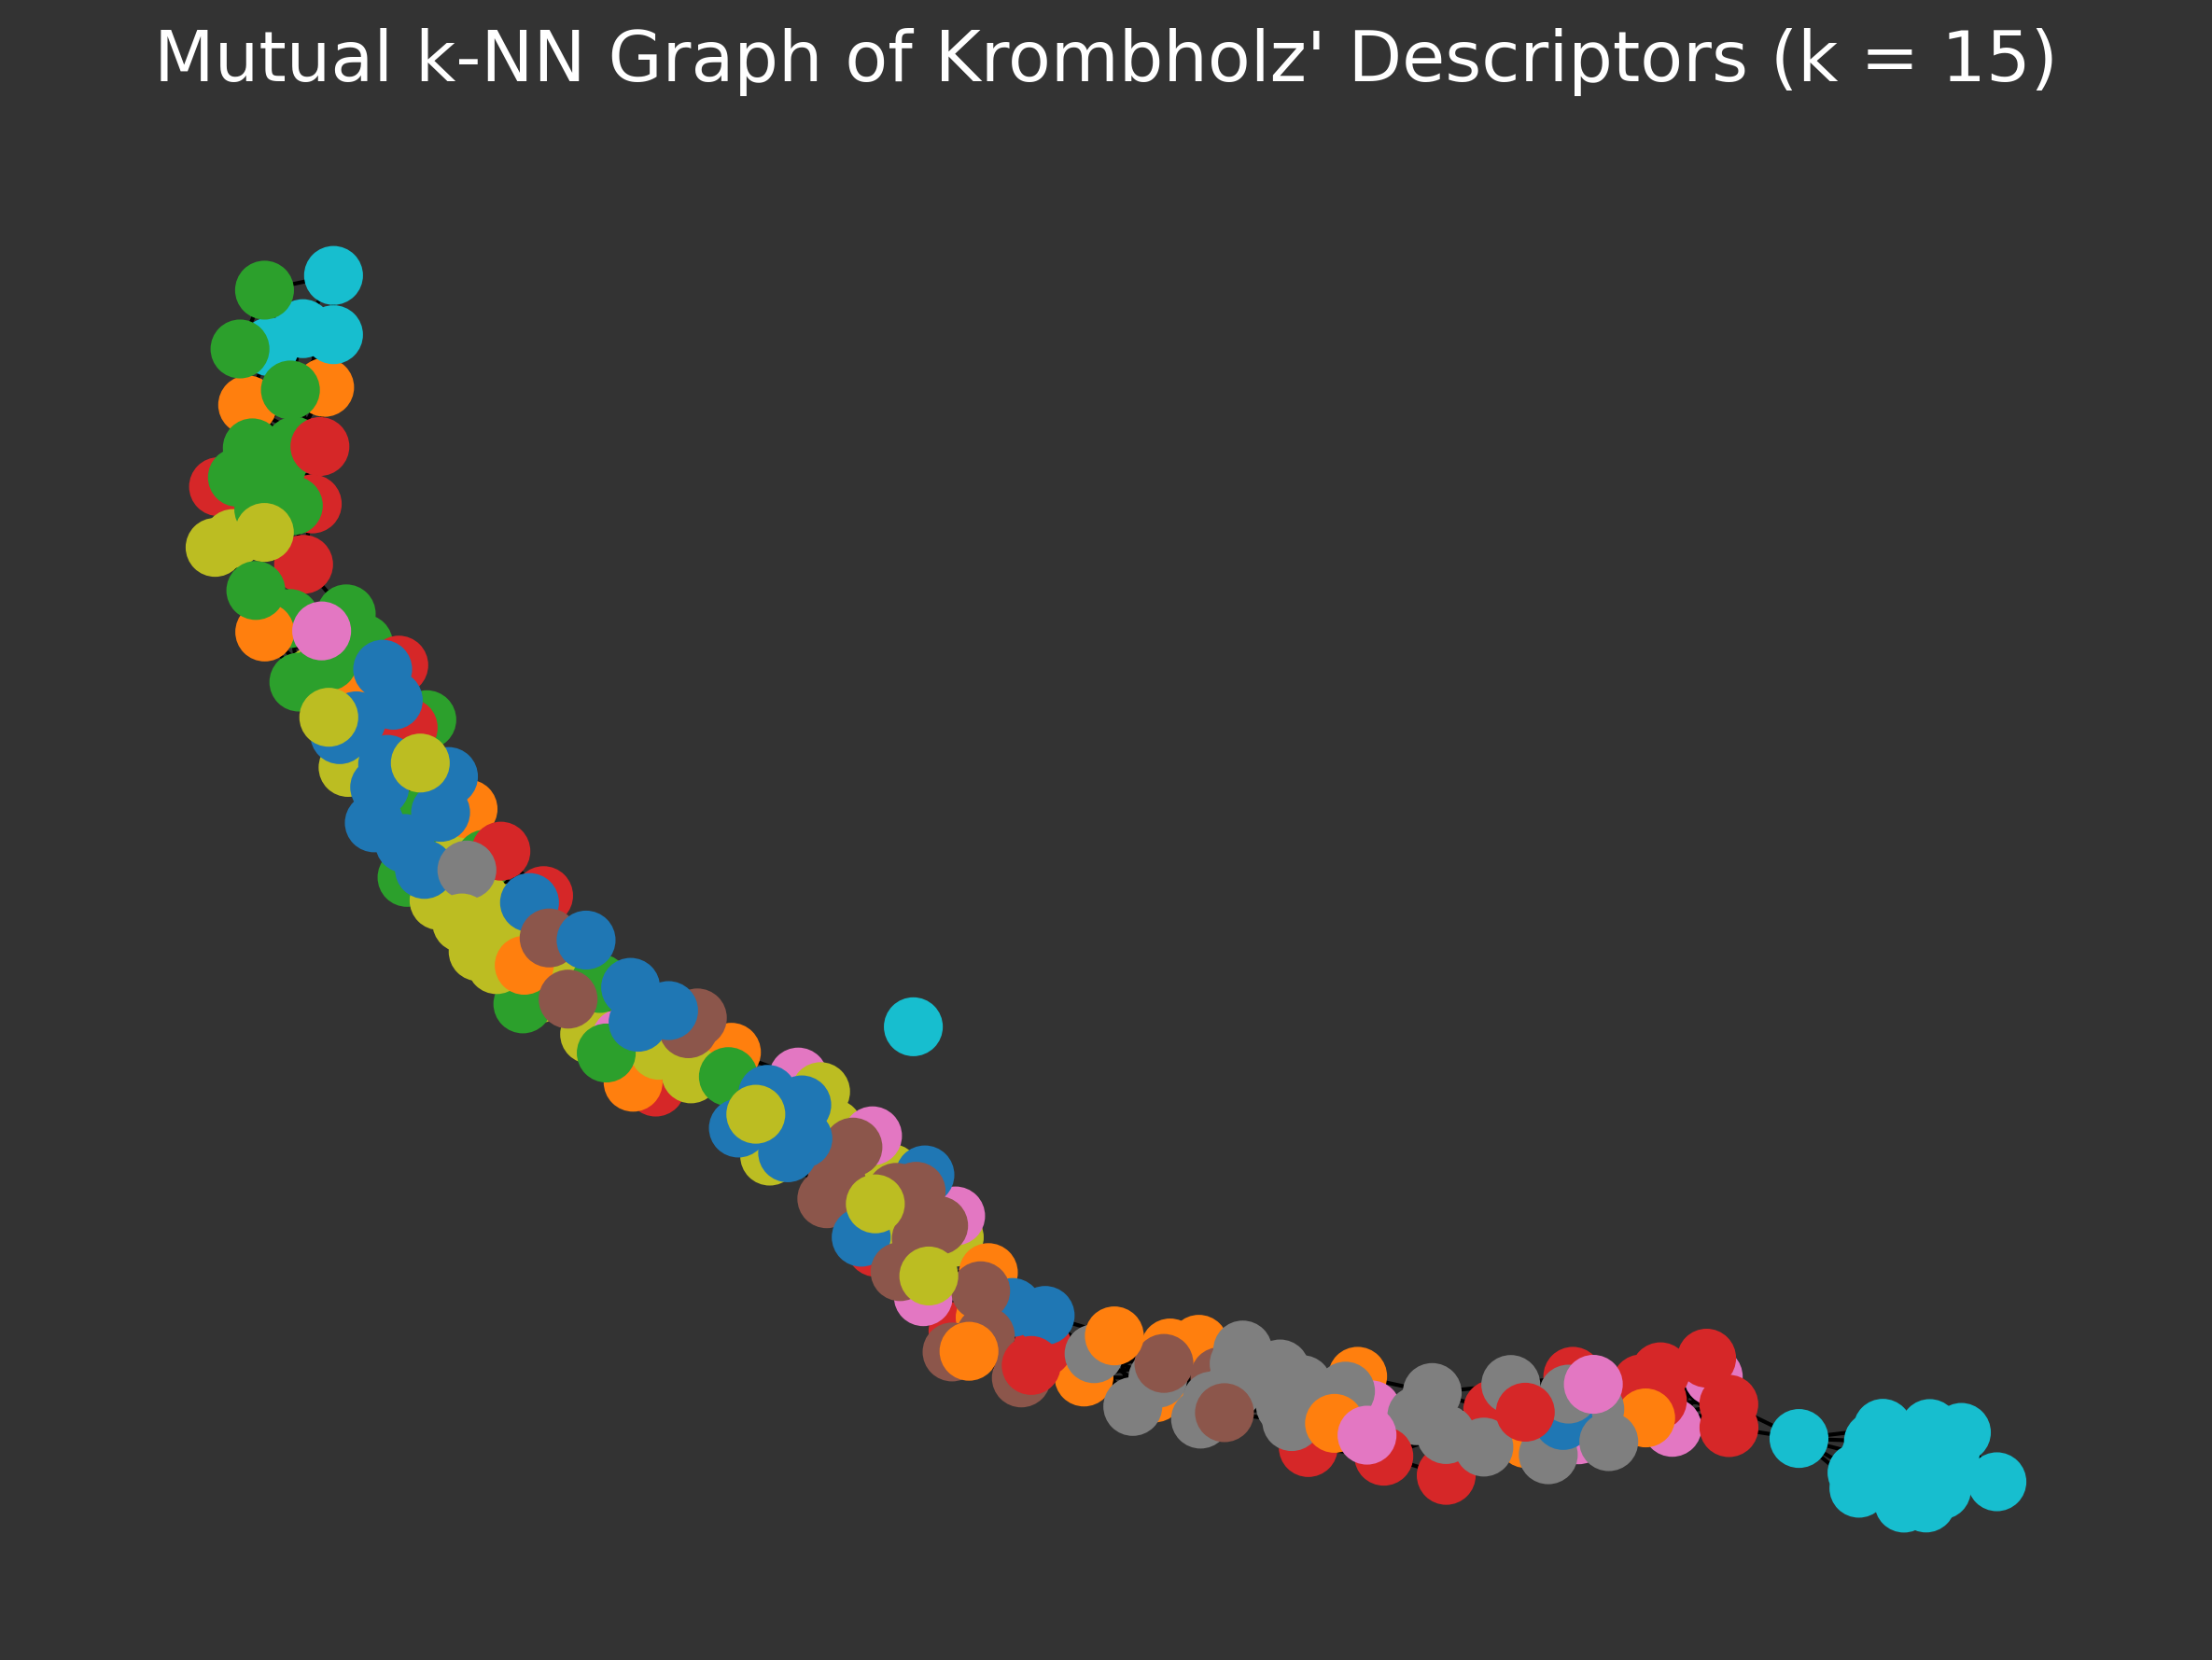

In [47]:
create_drawing(df, labels, ['evrap', 'samp', 'scomp', 'sirm'], 15, 'mutual', "k-NN Graph of Krombholz' Descriptors")

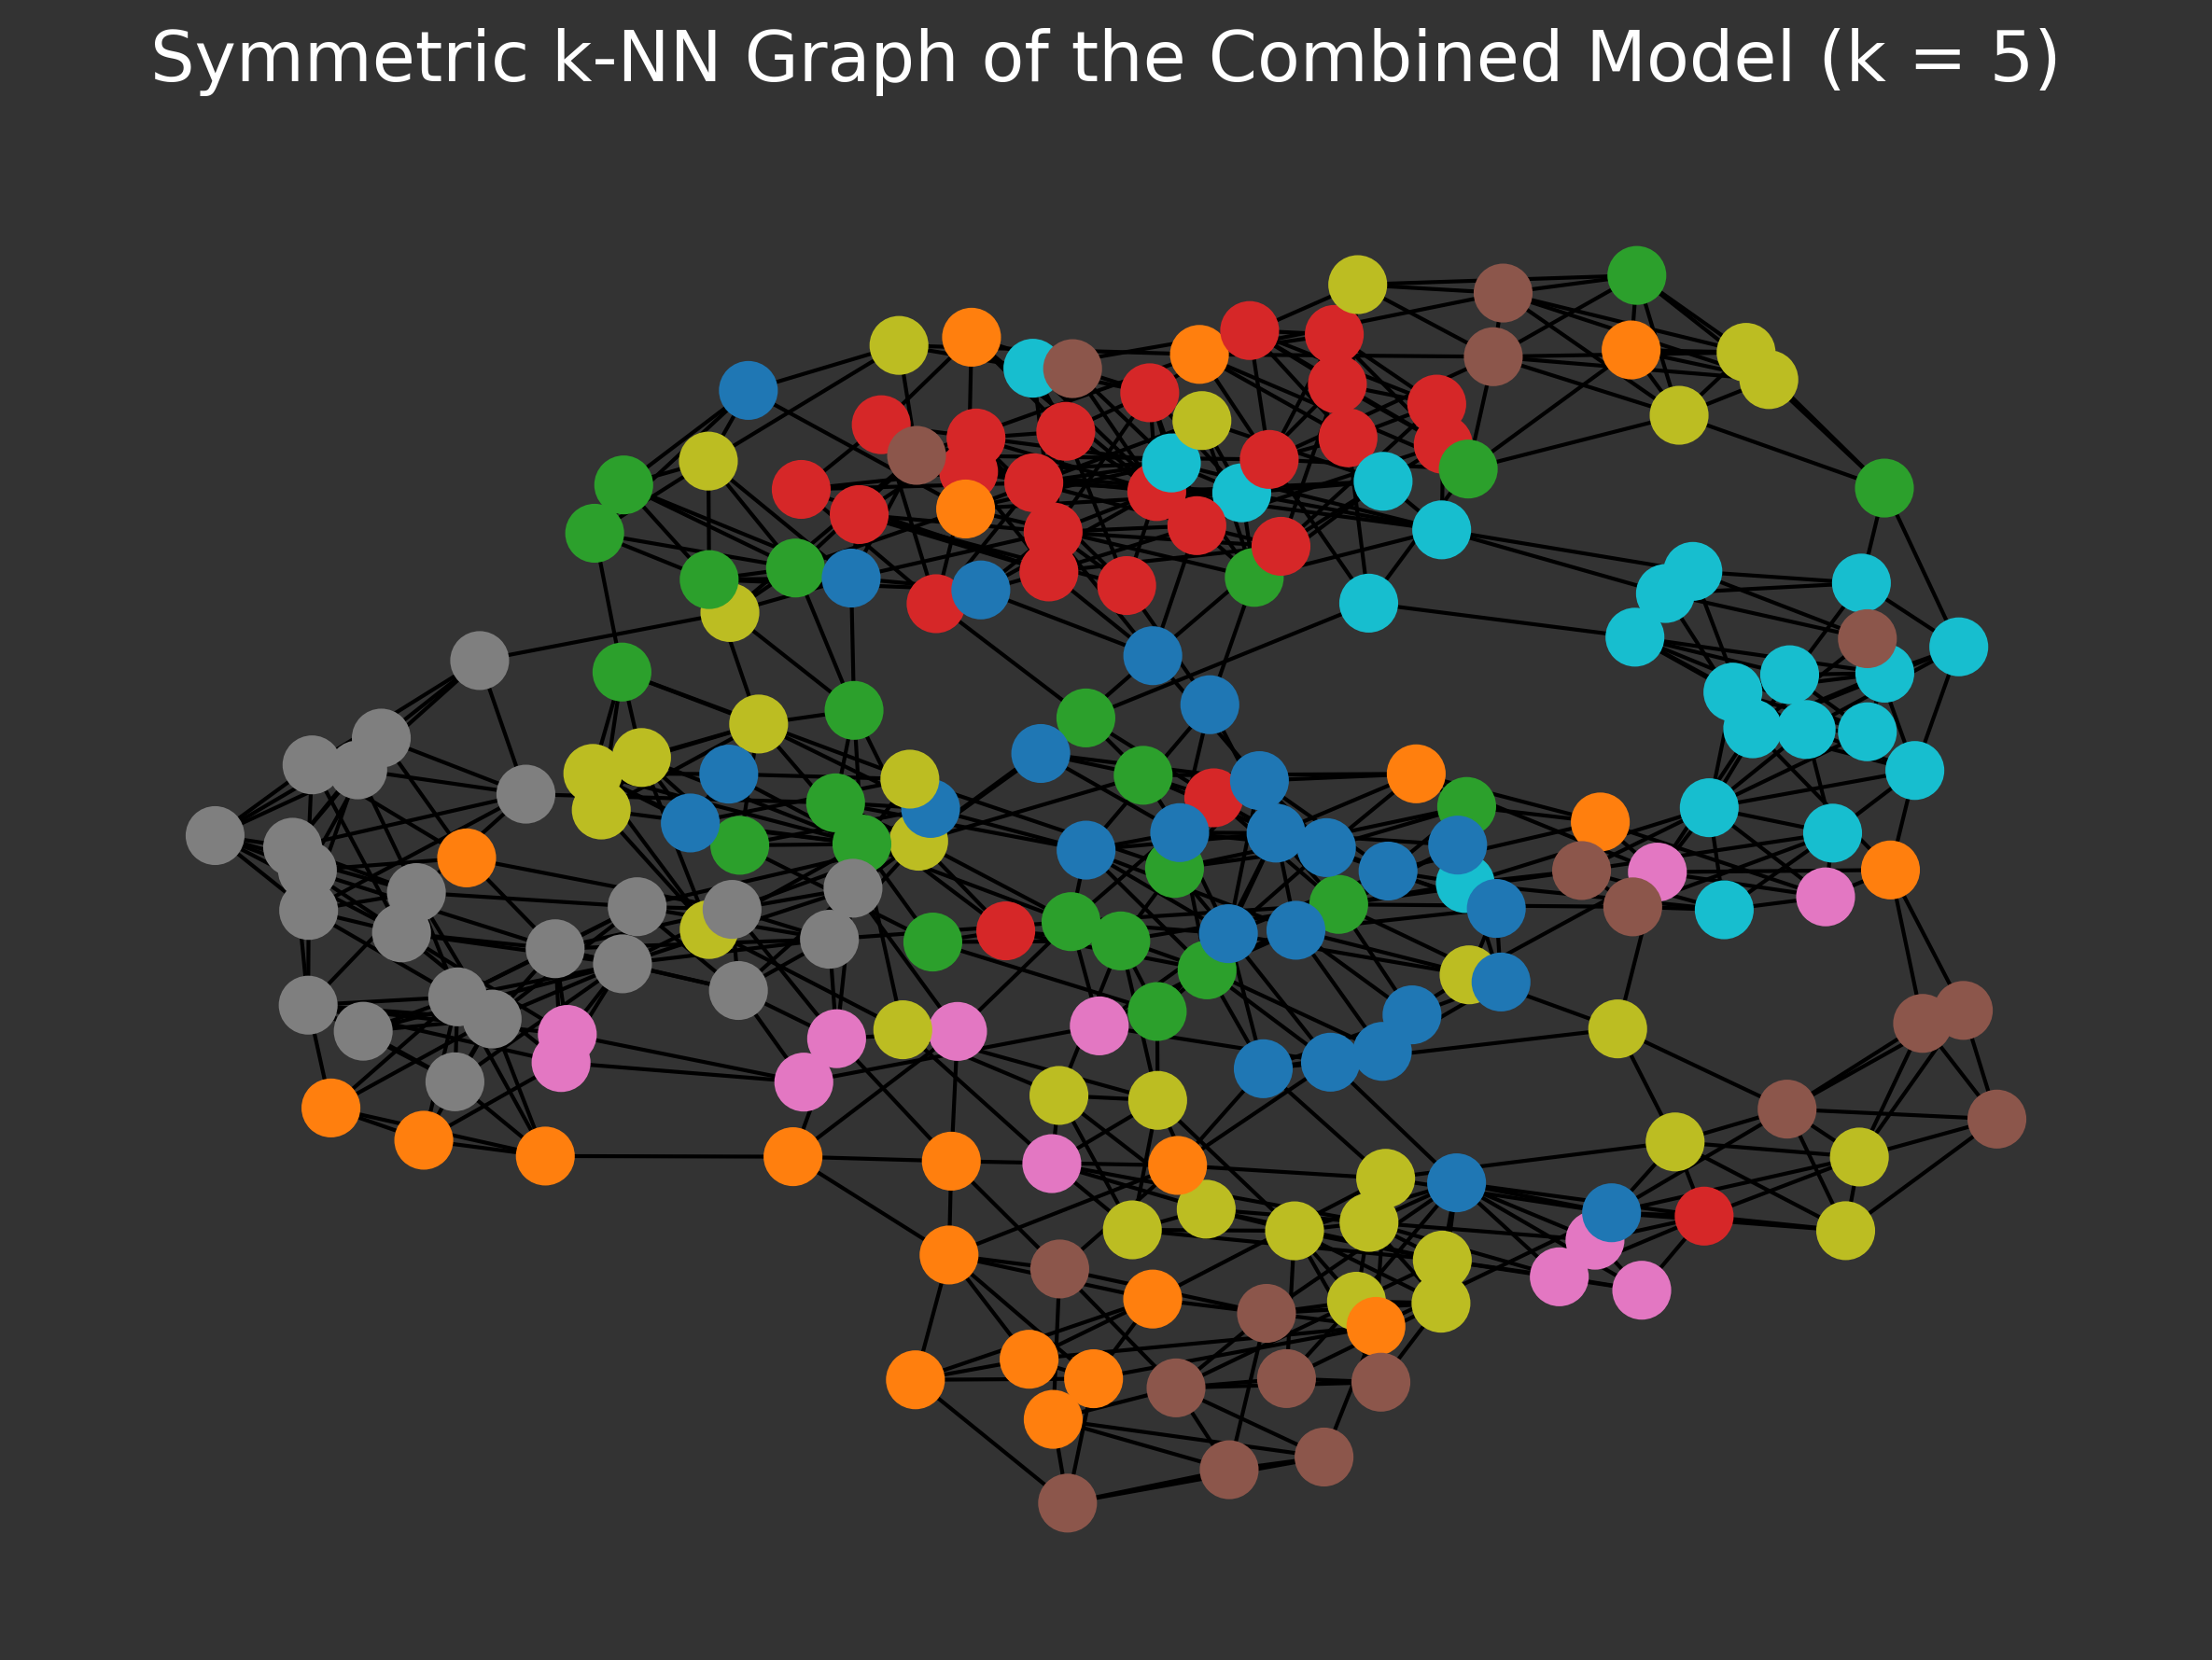

In [49]:
create_drawing(df, labels, ['combined_model'], 5, 'symmetric', "k-NN Graph of the Combined Model")

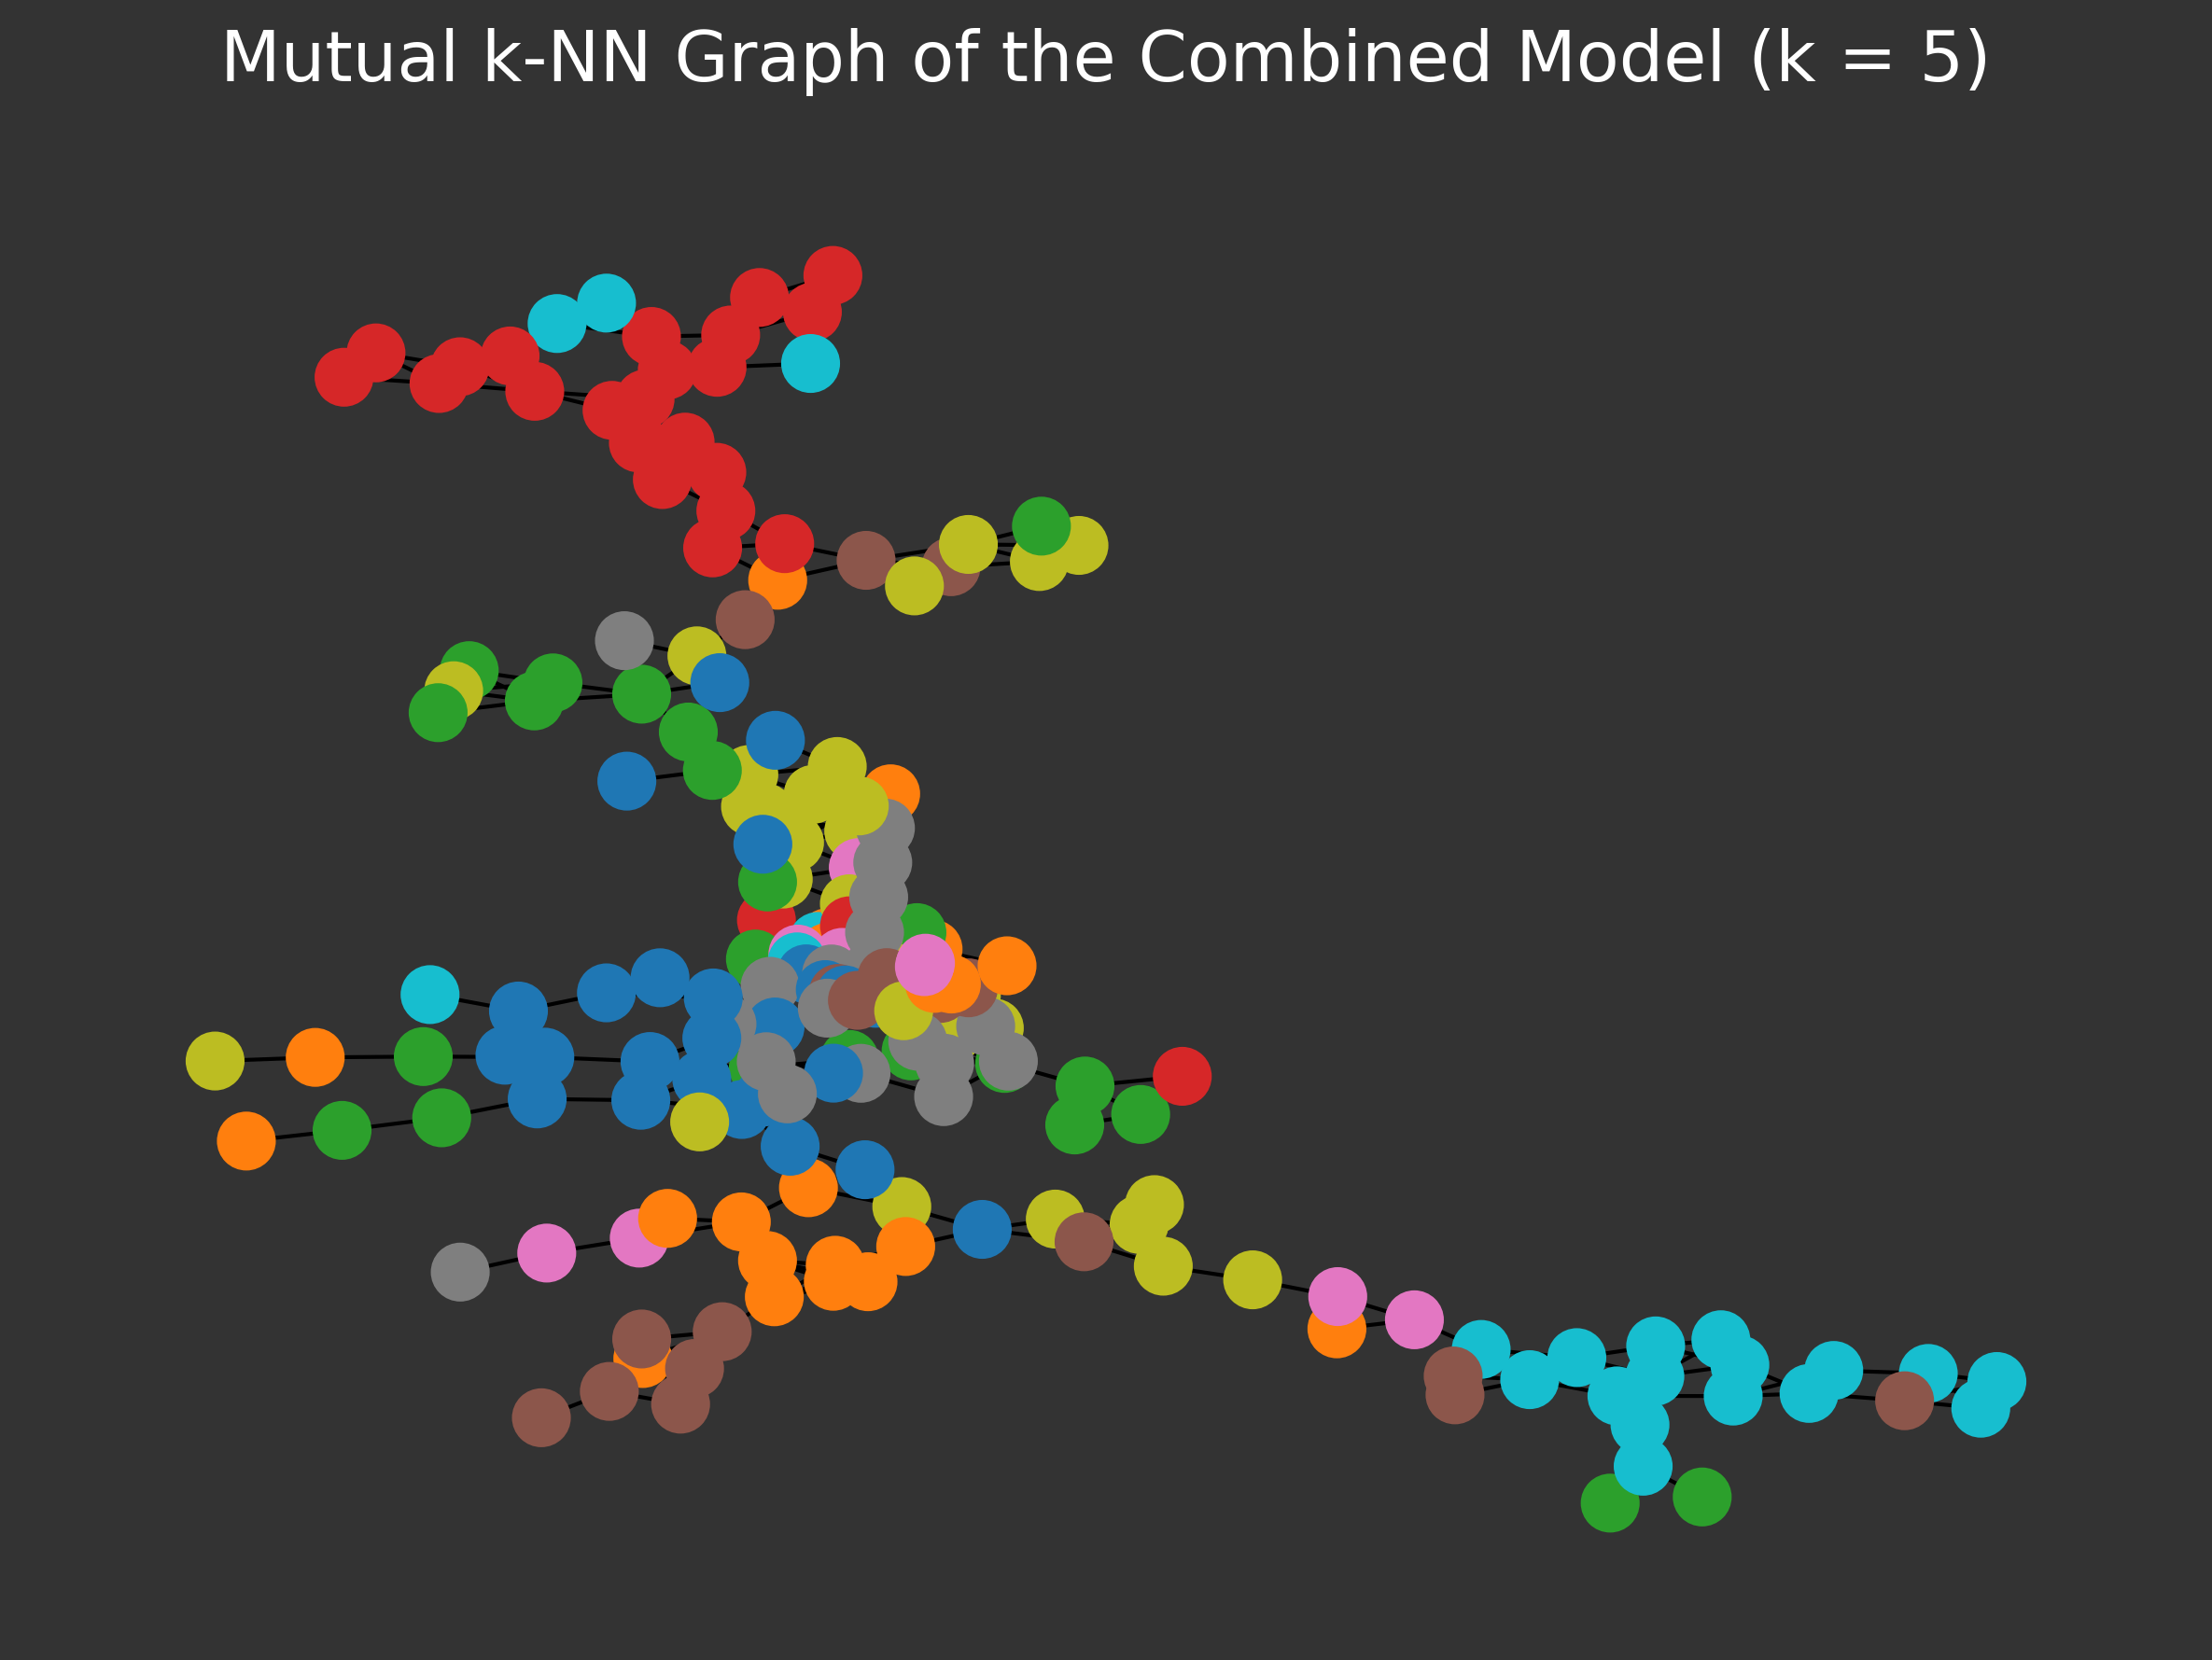

In [50]:
create_drawing(df, labels, ['combined_model'], 5, 'mutual', "k-NN Graph of the Combined Model")

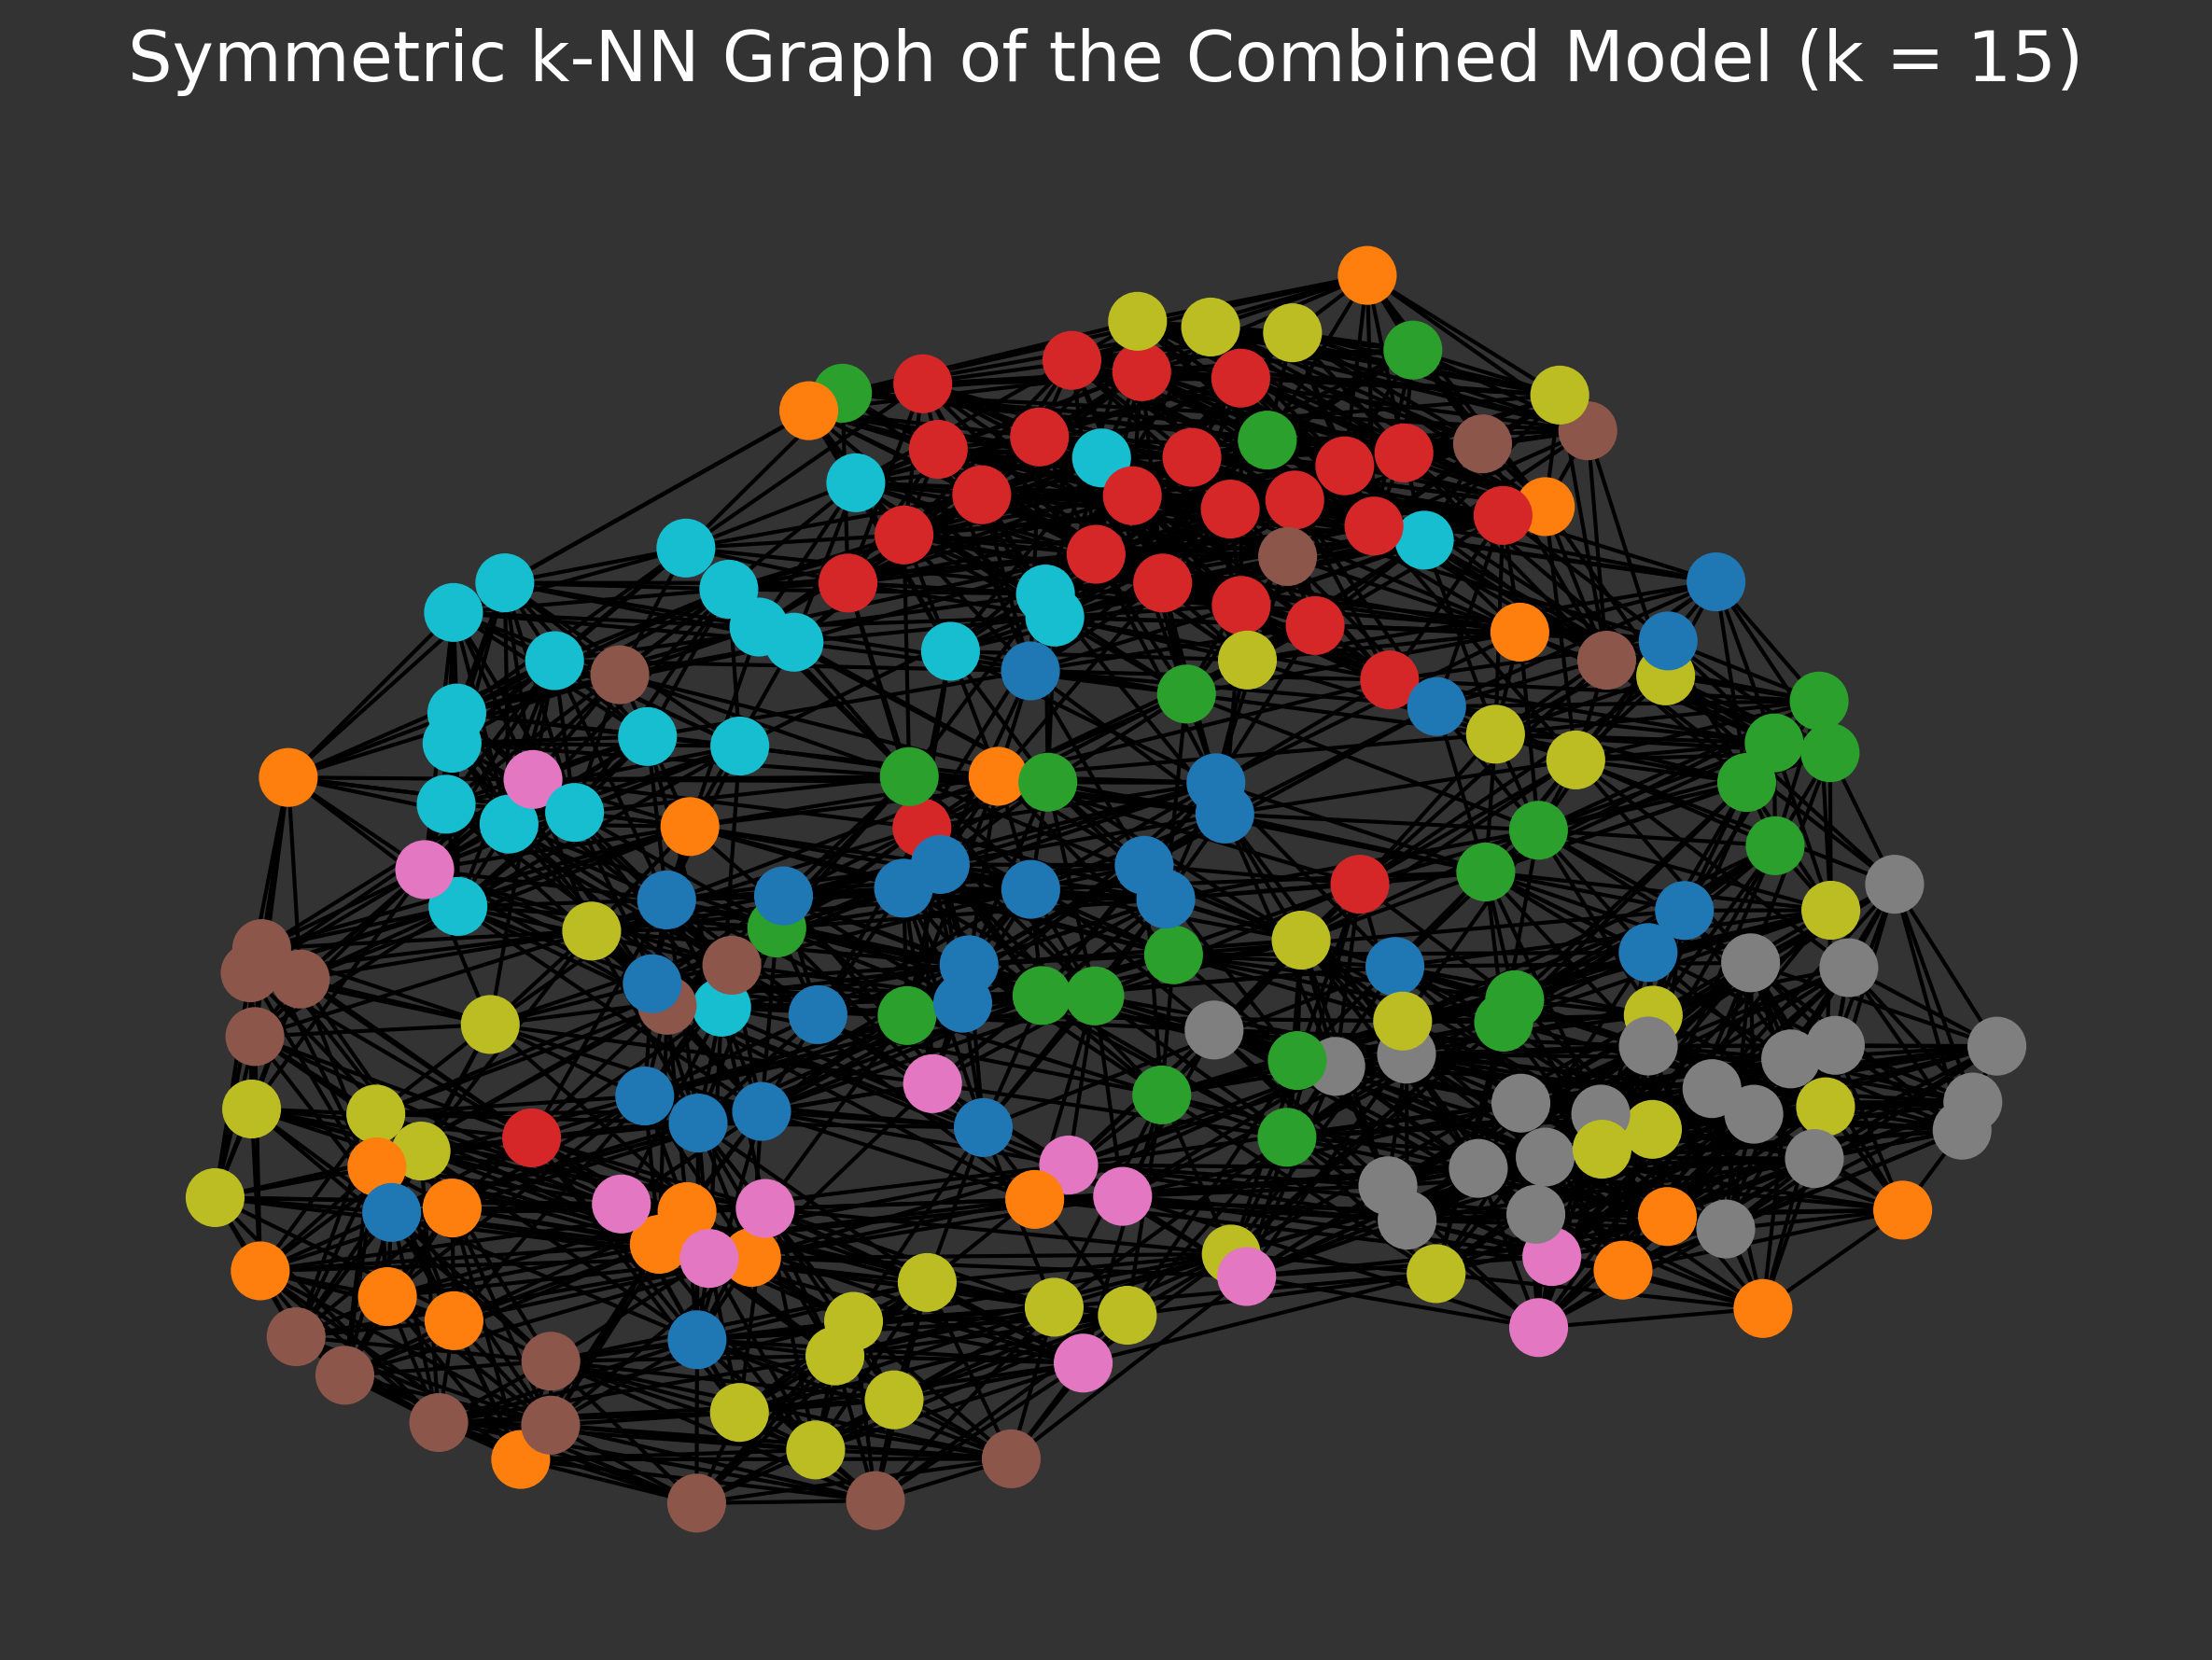

In [51]:
create_drawing(df, labels, ['combined_model'], 15, 'symmetric', "k-NN Graph of the Combined Model")

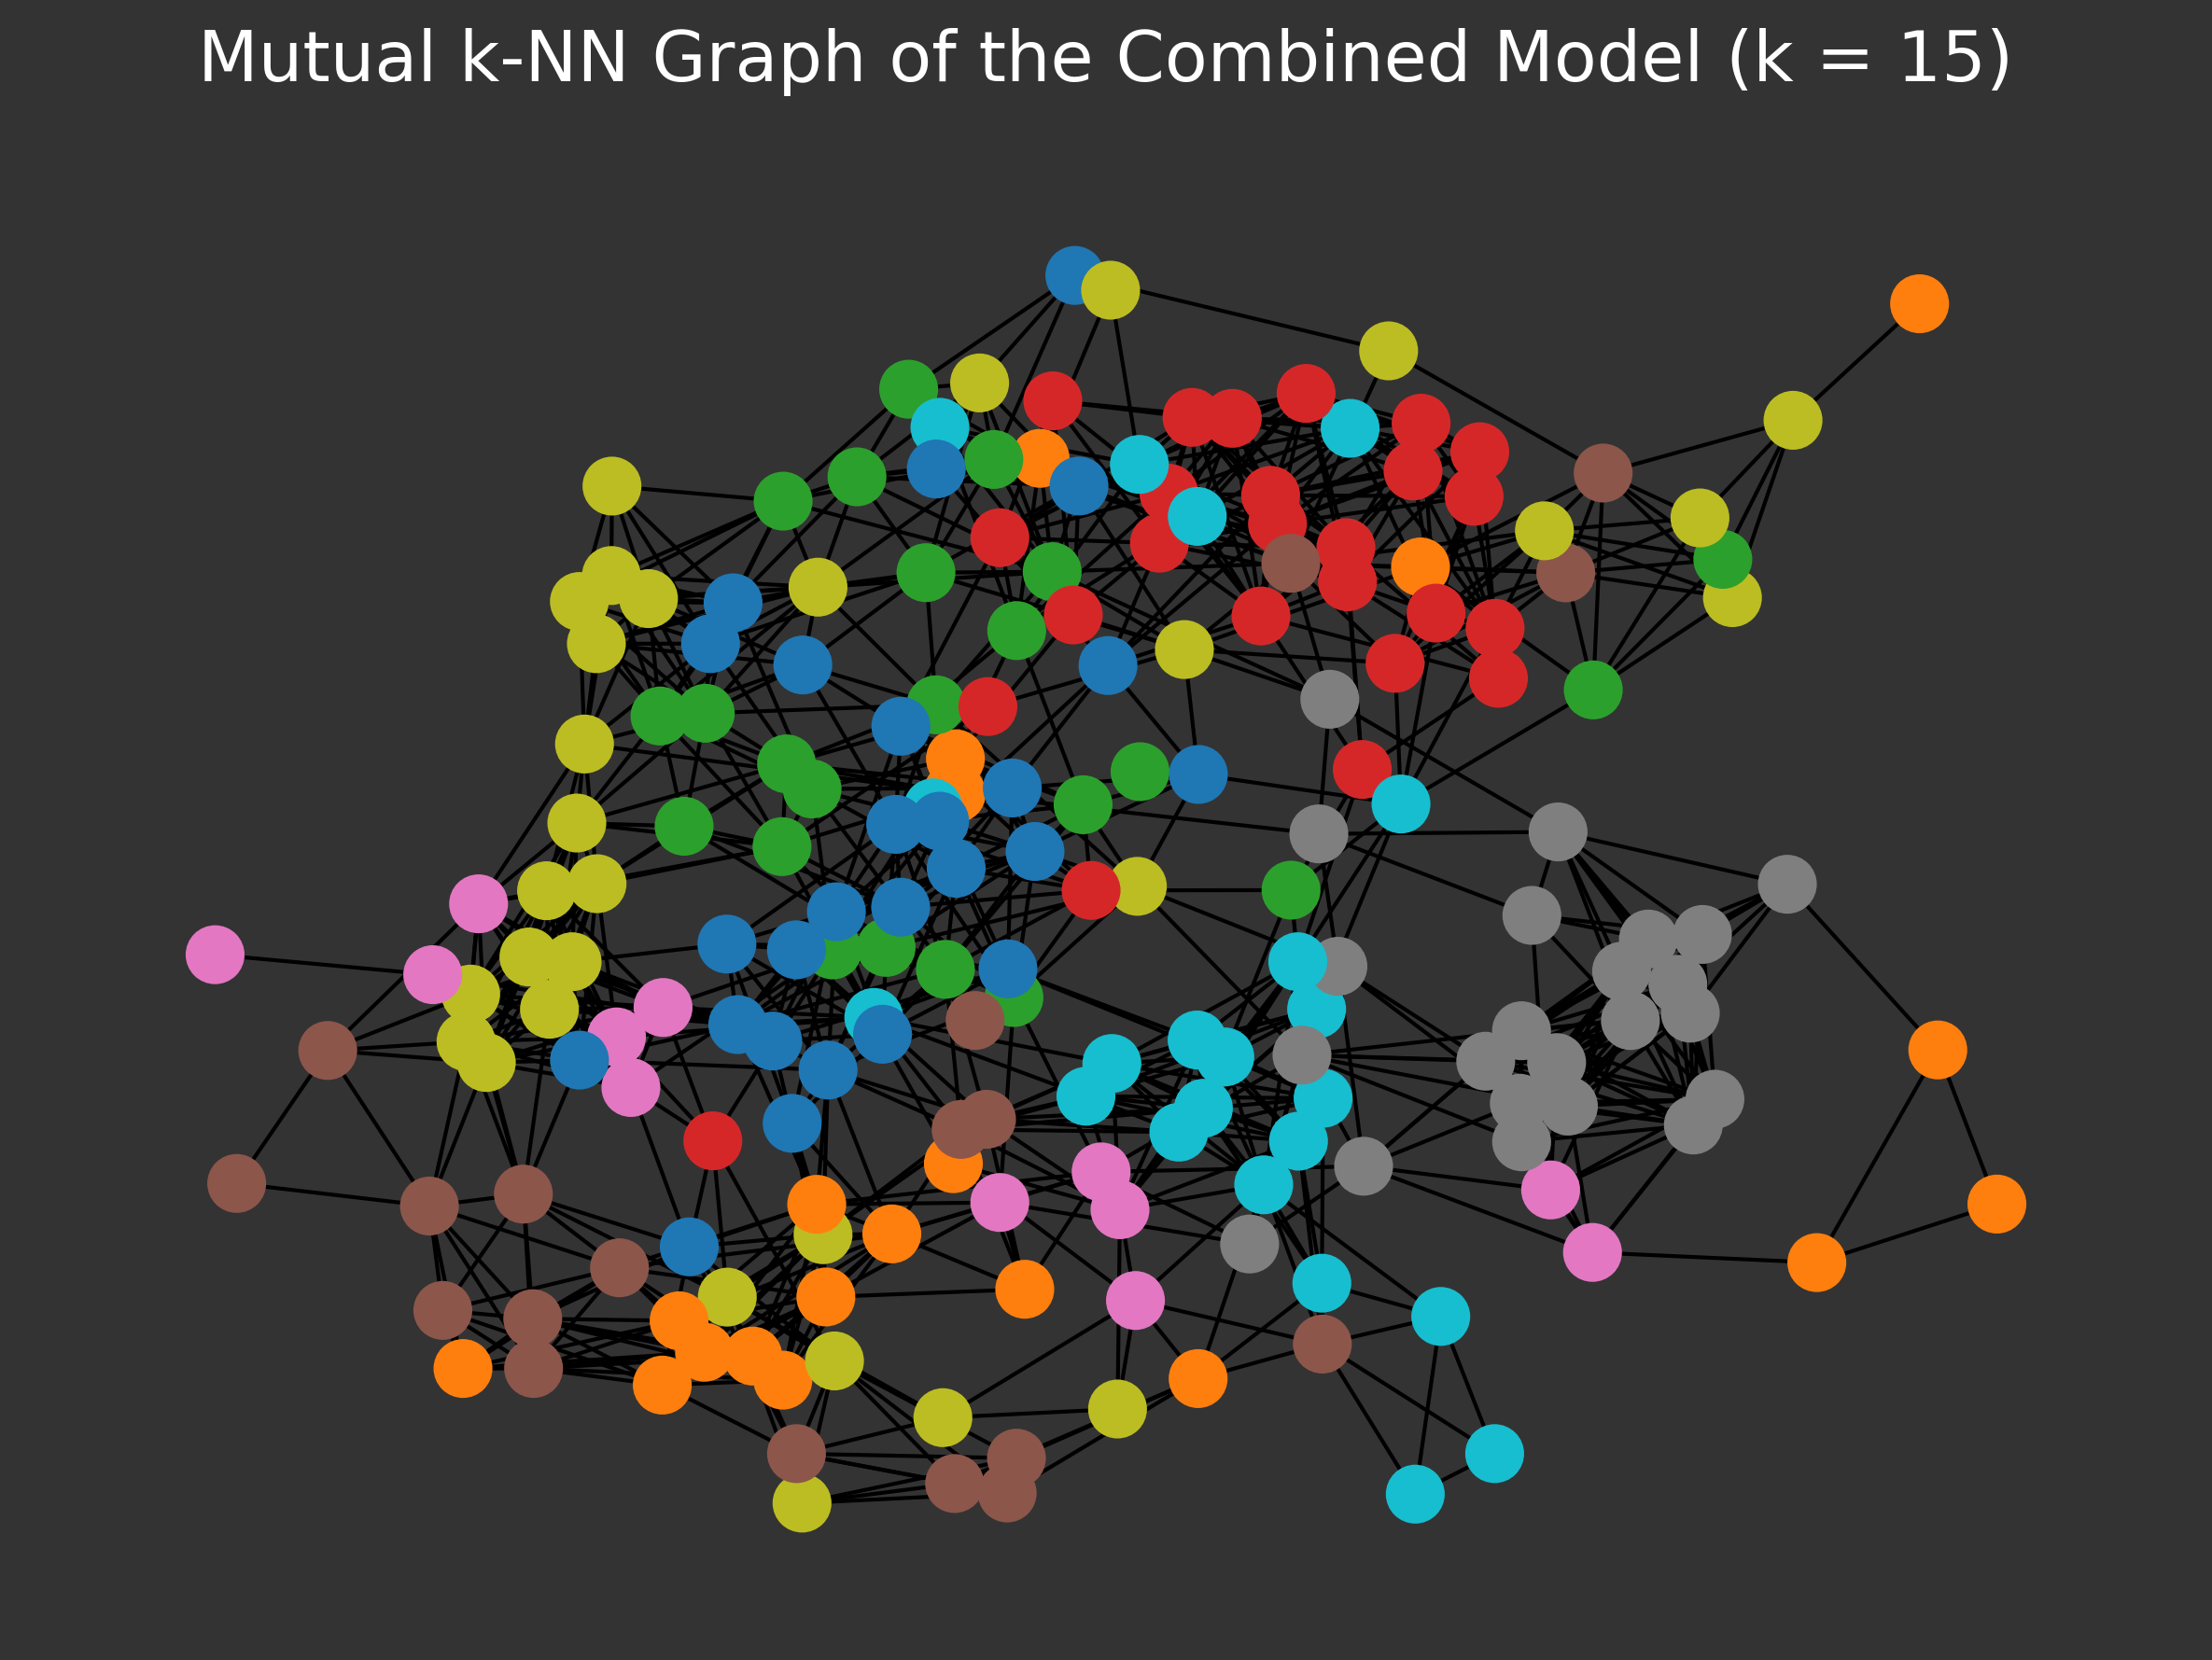

In [52]:
create_drawing(df, labels, ['combined_model'], 15, 'mutual', "k-NN Graph of the Combined Model")